In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import brewer2mpl
from matplotlib import rc
import matplotlib
rc('text', usetex=True)
matplotlib.rcParams['text.usetex'] = True 
matplotlib.rcParams['text.latex.preamble'] = '\usepackage{libertine}' 
plt.style.use('bmh')
#plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['grid.alpha'] = '0.5'
import scipy.optimize as opt

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [4]:
df = pd.read_csv("../../output/output.geojson.csv", delimiter=";")
df = df.fillna("-")

In [3]:
df = df.groupby(list(df.columns[:9])).mean()

In [4]:
df = df.reset_index()

# Create table

In [1]:
dfs = df[df["MAPPING"] == "SPHERICAL"]
dfs = dfs[dfs["WIDTH"] >= 64]
dfs = dfs[dfs["ALPHA"] == df["ALPHA"].unique()[13]]
dfst = dfs[dfs["TESS_OFF?"] == 1]
dfsg = dfs[dfs["GEOM_OFF?"] == 1]
dfs = dfs[dfs["GEOM_OFF?"] == 0]
dfs = dfs[dfs["TESS_OFF?"] == 0]

dfc = df[df["MAPPING"] == "CUBE"]

NameError: name 'df' is not defined

In [6]:
dfsm = dfs.groupby("WIDTH").mean()
dfsg = dfsg.groupby("WIDTH").mean()
dfst = dfst.groupby("WIDTH").mean()
dfcm = dfc.groupby("WIDTH").mean()

In [20]:
results_spherical = pd.concat([dfsm["GRAPHICS_FPS"], dfsg["GRAPHICS_FPS"], dfst["GRAPHICS_FPS"]], axis=1)
results_spherical = results_spherical.reset_index()
results_spherical.columns = ["Resolution", "FPS", "FPS-G", "FPS-T"]
results_spherical["Resolution"] = results_spherical["Resolution"].apply(lambda z : "{0}x{1}".format(z,z/2))
results_spherical["Mapping"] = "Spherical"
results_spherical

results_cube = pd.DataFrame(dfcm["GRAPHICS_FPS"])
results_cube = results_cube.reset_index()
results_cube.columns=["Resolution", "FPS"]
results_cube["Resolution"] = results_cube["Resolution"].apply(lambda z : "{0}x{0}".format(z))
results_cube["Mapping"] = "Cube"
results_cube

gfps = pd.concat([results_spherical, results_cube])
gfps = gfps.set_index(["Mapping", "Resolution"])
gfps = gfps.fillna('-')
gfps.to_latex("tables/gfps.tex", na_rep=r"-", float_format='{:.2f}'.format)
gfps

FPS    FPS-G    FPS-T
Mapping   Resolution                               
Spherical 64x32        7673.63015  52239.2    84162
          128x64       7711.71635    51251  82882.9
          256x128      7665.72610    48809  78416.2
          512x256      7519.99300  38198.1  57790.8
          1024x512     6191.73605  15321.8  20836.6
          2048x1024    3360.03085  4918.71  6047.49
Cube      16x16       50934.30450        -        -
          32x32       51251.77650        -        -
          64x64       50123.01550        -        -
          128x128     48408.44250        -        -
          256x256     23763.67300        -        -
          512x512      7586.67500        -        -
          1024x1024    2055.31905        -        -

In [21]:
results_spherical = pd.concat([dfsm["COMPUTE_FPS"], dfsg["COMPUTE_FPS"], dfst["COMPUTE_FPS"]], axis=1)
results_spherical = results_spherical.reset_index()
results_spherical.columns = ["Resolution", "FPS", "FPS-G", "FPS-T"]
results_spherical["Resolution"] = results_spherical["Resolution"].apply(lambda z : "{0}x{1}".format(z,z/2))
results_spherical["Mapping"] = "Spherical"
results_spherical

results_cube = pd.DataFrame(dfcm["COMPUTE_FPS"])
results_cube = results_cube.reset_index()
results_cube.columns=["Resolution", "FPS"]
results_cube["Resolution"] = results_cube["Resolution"].apply(lambda z : "{0}x{0}".format(z))
results_cube["Mapping"] = "Cube"
results_cube

cfps = pd.concat([results_spherical, results_cube])
cfps = cfps.set_index(["Mapping", "Resolution"])
cfps = cfps.fillna('-')
cfps.to_latex("tables/cfps.tex", na_rep="-", float_format='{:.2f}'.format)

In [22]:
cfps

FPS    FPS-G    FPS-T
Mapping   Resolution                                
Spherical 64x32       39207.227000  36473.6  37409.5
          128x64      37844.242500  37366.6  37500.1
          256x128     34455.614500  35463.8  35508.4
          512x256     21585.188500  21589.9  21620.1
          1024x512     7927.615800   7959.2  8016.62
          2048x1024    2872.710650  2866.09  2873.27
Cube      16x16       36974.653500        -        -
          32x32       38290.507500        -        -
          64x64       35703.782000        -        -
          128x128     32431.434000        -        -
          256x256     14141.712500        -        -
          512x512      2318.846750        -        -
          1024x1024     611.132205        -        -

# Plots

In [55]:
df = pd.read_csv("../../output/output.geojson.2.csv", delimiter=";")
df = df.fillna("-")
df = df[df["FUNCTION"] == "spherical_area"]

dfs = df[df["MAPPING"] == "SPHERICAL"]
dfc = df[df["MAPPING"] == "CUBE"]

In [56]:
best_spherical = dfs[
    ((dfs["ALPHA"] - 0.006135923) < 0.0001) &
    (dfs["WIDTH"] == 2048) &
    (dfs["TESS_OFF?"] == 0) &
    (dfs["GEOM_OFF?"] == 0)
   ][["X", "Y", "ACTUAL_RESULT"]]
best_cube = dfc[dfc["WIDTH"] == 1024][["X", "Y", "ACTUAL_RESULT"]]

expected_results = best_spherical
expected_results["EXPECTED_RESULT"] = (best_spherical["ACTUAL_RESULT"].values + best_cube["ACTUAL_RESULT"].values)/2
expected_results = expected_results.drop("ACTUAL_RESULT", axis=1)

In [57]:
df = df.drop("EXPECTED_RESULT", axis=1)

In [59]:
df = df.merge(expected_results, on=["X", "Y"])

In [60]:
df["ERROR"] = np.abs(df["EXPECTED_RESULT"] - df["ACTUAL_RESULT"]) / df["EXPECTED_RESULT"]
dfs = df[df["MAPPING"] == "SPHERICAL"]
dfc = df[df["MAPPING"] == "CUBE"]

In [64]:
dfc

,MAPPING,FUNCTION,OBJ,WIDTH,REPEATS,RMAX,GEOM_OFF?,TESS_OFF?,ALPHA,X,Y,Z,ACTUAL_RESULT,GRAPHICS_FPS,COMPUTE_FPS,Unnamed: 16,EXPECTED_RESULT,ERROR
80,CUBE,spherical_area,mooctask.geojson,1024,100,10000.0,-,-,-,-110.962,-74.622,4.0,0.304414,1190.28,162.038,-,0.304628,0.000704
81,CUBE,spherical_area,mooctask.geojson,512,100,10000.0,-,-,-,-110.962,-74.622,4.0,0.304432,4442.47,1332.600,-,0.304628,0.000645
82,CUBE,spherical_area,mooctask.geojson,256,100,10000.0,-,-,-,-110.962,-74.622,4.0,0.304488,13678.00,7808.840,-,0.304628,0.000461
83,CUBE,spherical_area,mooctask.geojson,128,100,10000.0,-,-,-,-110.962,-74.622,4.0,0.302549,30873.70,17030.000,-,0.304628,0.006826
164,CUBE,spherical_area,mooctask.geojson,1024,100,10000.0,-,-,-,-110.962,-51.646,4.0,0.625838,1190.69,164.310,-,0.625700,0.000220
165,CUBE,spherical_area,mooctask.geojson,512,100,10000.0,-,-,-,-110.962,-51.646,4.0,0.626049,4455.53,1373.290,-,0.625700,0.000557
166,CUBE,spherical_area,mooctask.geojson,256,100,10000.0,-,-,-,-110.962,-51.646,4.0,0.626507,14380.20,10026.100,-,0.625700,0.001289
167,CUBE,spherical_area,mooctask.geojson,128,100,10000.0,-,-,-,-110.962,-51.646,4.0,0.624077,31172.10,25601.600,-,0.625700,0.002595
248,CUBE,spherical_area,mooctask.geojson,1024,100,10000.0,-,-,-,-110.962,-28.670,4.0,1.155770,1180.90,162.700,-,1.156865,0.000947
249,CUBE,spherical_area,mooctask.geojson,512,100,10000.0,-,-,-,-110.962,-28.670,4.0,1.153250,4456.92,1372.330,-,1.156865,0.003125


In [61]:
# Only tess off
dfst = dfs[dfs["TESS_OFF?"] == 1]
dfst = dfst[dfst["GEOM_OFF?"] == 0]

# Only geom off
dfsg = dfs[dfs["GEOM_OFF?"] == 1]
dfsg = dfsg[dfsg["TESS_OFF?"] == 0]

# Both on
dfsb = dfs[dfs["GEOM_OFF?"] == 0]
dfsb = dfsb[dfsb["TESS_OFF?"] == 0]

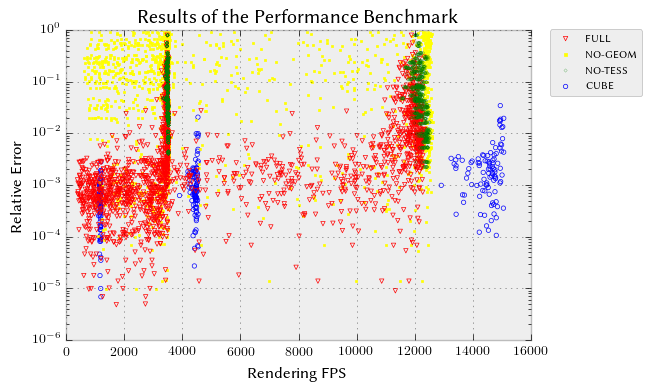

In [177]:
f = plt.figure()
ax = f.gca()

ax.scatter(dfc["GRAPHICS_FPS"], dfc["ERROR"], color='blue', s=10, marker="o", label="CUBE", facecolor='none')
ax.scatter(dfsg["GRAPHICS_FPS"], dfsg["ERROR"], color='yellow', s=3, marker="s", label="NO-GEOM")
ax.scatter(dfsb["GRAPHICS_FPS"], dfsb["ERROR"], color='red', s=10, marker="v", label="FULL", facecolor='none')
ax.scatter(dfst["GRAPHICS_FPS"], dfst["ERROR"], color='green', s=3, marker="D", label="NO-TESS", facecolor='none', linewidths=0.3, alpha=0.5)

ax.set_yscale('log', basey=10)
ax.set_ylim((10**-6,10**0))
lx = ax.set_xlabel(r"Rendering FPS")
ly = ax.set_ylabel(r"Relative Error")

handles, labels = ax.get_legend_handles_labels()
hl=zip(handles, labels)
hl = [hl[i] for i in (2,1,3,0)]
handles, labels = zip(*hl)
lg = ax.legend(handles, labels, fontsize=8, bbox_to_anchor=(1.25,1.02), scatterpoints=1)
t = ax.set_title(r"Results of the Performance Benchmark")
ax.set_xlim((0,16000))
f.savefig("plots/benchmark_lims.png", bbox_extra_artists=(lg,lx,ly,t), bbox_inches='tight', dpi=400)